In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("data.csv")
df.head()

,Trial,Mouse X,Mouse Y,Cursor X,Cursor Y,Rotation
0,0,-1.0,-1.0,0.366025,-1.366025,1.047198
1,0,-1.0,-1.0,0.366025,-1.366025,1.047198
2,0,-1.0,-1.0,0.366025,-1.366025,1.047198
3,0,-1.0,-1.0,0.366025,-1.366025,1.047198
4,0,-1.0,-1.0,0.366025,-1.366025,1.047198


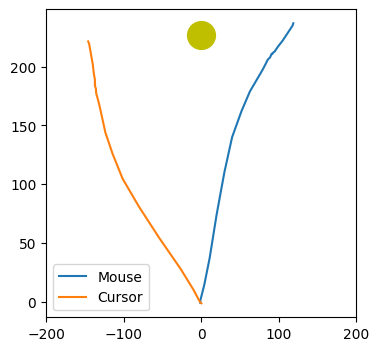

In [174]:
import matplotlib.pyplot as plt

target_loc_x, target_loc_y = (0, 3.78*60)

trial_min = 0
trial_max = 0
df_head = df[df["Trial"].between(trial_min, trial_max)]


for trial, trial_data in df_head.groupby("Trial"):
    plt.figure(figsize=(4, 4))
    plt.plot(trial_data["Mouse X"], trial_data["Mouse Y"], label=f"Mouse")
    plt.plot(trial_data["Cursor X"], trial_data["Cursor Y"], label=f"Cursor")
    plt.scatter(target_loc_x, target_loc_y, s=400, color='y')

    plt.xlim([-200, 200])
    plt.legend()
    plt.show()



In [175]:
# Compute start and end positions for each trial
df_grouped = df.groupby("Trial")[["Cursor X", "Cursor Y"]].agg(["first", "last"])

# Compute displacement
df_grouped["Delta X"] = df_grouped[("Cursor X", "last")] - df_grouped[("Cursor X", "first")]
df_grouped["Delta Y"] = df_grouped[("Cursor Y", "last")] - df_grouped[("Cursor Y", "first")]

df_grouped["Angle Radians"] = np.arctan2(df_grouped["Delta X"], df_grouped["Delta Y"])  # atan2(x, y)
df_grouped["Angle Degrees"] = np.degrees(df_grouped["Angle Radians"])

df_grouped["Rotation"] = np.rad2deg(df.groupby("Trial")["Rotation"].first())

df_grouped.head()

Cursor X              Cursor Y                 Delta X     Delta Y  \
          first        last     first        last                           
Trial                                                                       
0      0.366025 -145.748021 -1.366025  221.557023 -146.114046  222.923048   
1      8.794229  -73.188420 -2.767949  221.233938  -81.982649  224.001887   
2      0.633975  -62.812776  3.098076  267.205081  -63.446751  264.107005   
3      1.598076  -23.635861 -3.232051  263.061487  -25.233938  266.293538   
4      2.098076    9.612850 -2.366025  264.649944    7.514774  267.015970   

      Angle Radians Angle Degrees Rotation  
                                            
Trial                                       
0         -0.580194    -33.242682     60.0  
1         -0.350849    -20.102165     60.0  
2         -0.235764    -13.508260     60.0  
3         -0.094478     -5.413176     60.0  
4          0.028136      1.612080     60.0

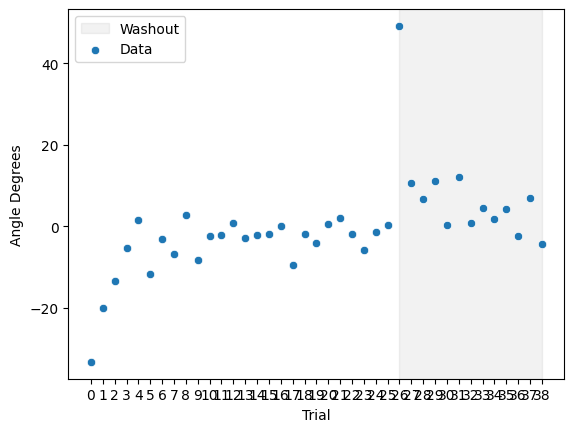

In [176]:
washout_trials = df_grouped[df_grouped["Rotation"] == 0]
washout_start = washout_trials.index.min()
washout_end = washout_trials.index.max()


plt.axvspan(washout_start, washout_end, color="gray", alpha=0.1, label="Washout")
sns.scatterplot(
    data=df_grouped,
    x="Trial",
    y="Angle Degrees",
    label='Data'
)
plt.xticks(df_grouped.index);
plt.legend(frameon=True)